<a href="https://colab.research.google.com/github/aksl007/ai_source/blob/main/02_01_RF_hyperparam_hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. HR 데이터를 불러오고, 요약 정보를 출력하세요.
* 첨부한 hr_data 파일을 사용합니다.
 * 첫 열을 인덱스로 지정합니다.
* 변수의 데이터 타입, 결측치 개수 등을 확인합니다.
 * 변수는 총 11개입니다.

In [ ]:
import pandas as pd

hr = pd.read_csv('/content/hr_data.csv')
hr.set_index('Unnamed: 0', inplace=True)
hr.index
hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   birthday              1470 non-null   object 
 1   entry_year            1470 non-null   int64  
 2   department            1470 non-null   object 
 3   marital_status        1143 non-null   object 
 4   performance_rating    1470 non-null   object 
 5   job_satisfaction      1470 non-null   object 
 6   working_hours         1470 non-null   float64
 7   salary                1470 non-null   int64  
 8   last_year_salary      1470 non-null   int64  
 9   num_companies_worked  1209 non-null   float64
 10  attrition             1470 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 137.8+ KB


In [ ]:
hr.describe()

,entry_year,working_hours,salary,last_year_salary,num_companies_worked
count,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1209.000000
mean,2009.720408,7.821905,6.215402e+06,5.703286e+06,2.723739
std,7.780782,1.006809,2.462578e+06,1.844078e+06,2.514812
min,1981.000000,6.670000,2.346000e+06,2.153874e+06,0.000000
25%,2006.000000,7.200000,4.487738e+06,4.149512e+06,1.000000
50%,2011.000000,7.800000,6.097875e+06,5.670316e+06,2.000000
75%,2015.000000,8.330000,7.705208e+06,7.099342e+06,4.000000
max,2021.000000,18.670000,3.734900e+07,1.022286e+07,9.000000


In [ ]:
hr.head()

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
Unnamed: 0,,,,,,,,,,,
0,1980-7-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes
1,1972-11-8,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no
2,1984-5-7,2014,rnd,single,high,high,9.00,9898200,9176045,6.0,yes
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.0,no
4,1994-7-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no


# 2. 결측치를 처리하세요.
* 결측치가 있는 변수의 이름을 출력합니다.
* 해당 변수가 범주형이면 결측치 행을 기타('etc')로 대체합니다.
* 해당 변수가 수치형이면 부서(department)별 중앙값으로 대체합니다.
* 결측치가 처리되었는지 확인합니다.
 * missingno를 이용해 시각화해도 괜찮습니다.

In [ ]:
hr.isna().sum()

,0
birthday,0
entry_year,0
department,0
marital_status,327
performance_rating,0
job_satisfaction,0
working_hours,0
salary,0
last_year_salary,0
num_companies_worked,261


In [ ]:
hr['marital_status'].value_counts()

,count
marital_status,
married,673
single,470


In [ ]:
hr['marital_status'] = hr['marital_status'].fillna('etc')

In [ ]:
hr['marital_status'].isna().sum()

0

In [ ]:
hr['marital_status'].value_counts()

,count
marital_status,
married,673
single,470
etc,327


In [ ]:
hr['num_companies_worked'].isna().sum()

261

In [ ]:
hr['num_companies_worked'].value_counts()

,count
num_companies_worked,
1.0,423
0.0,162
3.0,133
4.0,120
2.0,116
7.0,63
6.0,56
5.0,50
9.0,44


In [ ]:
hr.groupby('department')['num_companies_worked'].median()

,num_companies_worked
department,
hr,2.0
rnd,2.0
sales,1.0


In [ ]:
new_column = hr.groupby('department')['num_companies_worked'].apply(lambda x: x.fillna(x.median()))
hr["num_companies_worked"] = new_column.reset_index(level=0, drop=True)

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   birthday              1470 non-null   object 
 1   entry_year            1470 non-null   int64  
 2   department            1470 non-null   object 
 3   marital_status        1470 non-null   object 
 4   performance_rating    1470 non-null   object 
 5   job_satisfaction      1470 non-null   object 
 6   working_hours         1470 non-null   float64
 7   salary                1470 non-null   int64  
 8   last_year_salary      1470 non-null   int64  
 9   num_companies_worked  1470 non-null   float64
 10  attrition             1470 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 137.8+ KB


#3. 이상치를 처리하세요.
* 수치형 변수의 박스 플롯을 그립니다.
 * 스케일이 크게 차이날 경우 분리해서 차트를 그립니다.
* IQR을 이용해 이상치를 탐지하고 제거합니다.
 * 변수의 이상치가 현실적이라 판단되면 제거하지 않아도 됩니다.
* 남은 데이터 수를 출력하고, 한 번 더 박스 플롯으로 시각화합니다.

In [ ]:
hr.head()

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
Unnamed: 0,,,,,,,,,,,
0,1980-7-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes
1,1972-11-8,2011,rnd,married,very high,medium,6.93,5170672,4617495,2.0,no
2,1984-5-7,2014,rnd,single,high,high,9.00,9898200,9176045,6.0,yes
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.0,no
4,1994-7-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no


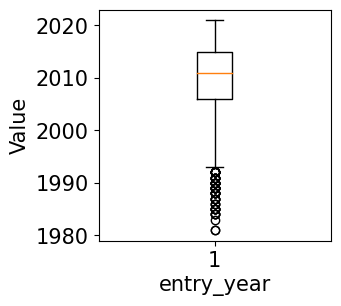

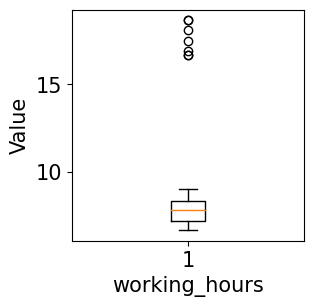

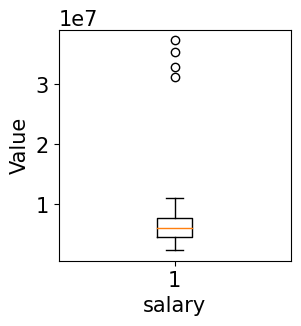

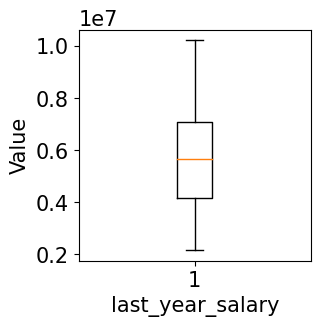

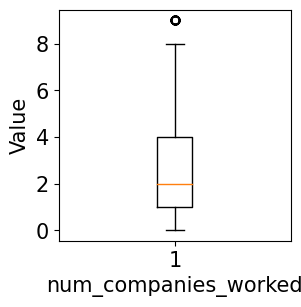

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['font.size'] = 15

number_columns = ['entry_year', 'working_hours', 'salary', 'last_year_salary', 'num_companies_worked']

for column in number_columns:
  fig, ax = plt.subplots()
  ax.boxplot(hr[column])
  ax.set_xlabel(column)
  ax.set_ylabel('Value')
  plt.show()



In [ ]:
working_hours_q1=hr['working_hours'].quantile(0.25)
working_hours_q2=hr['working_hours'].quantile(0.5)
working_hours_q3=hr['working_hours'].quantile(0.75)
working_hours_iqr=working_hours_q3-working_hours_q1

working_hours_max=working_hours_q3+1.5*working_hours_iqr

working_hours_max

condition=hr['working_hours'] > working_hours_max
hr[condition]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
Unnamed: 0,,,,,,,,,,,
67,1976-7-9,1996,rnd,etc,high,low,18.10,5568345,5113264,2.0,no
184,1968-8-7,2016,rnd,etc,high,low,16.93,4693728,4443555,1.0,no
220,1985-10-17,2005,rnd,single,high,medium,16.67,4875400,4500507,8.0,no
430,1986-1-13,2015,rnd,single,high,high,18.67,4690140,4360081,0.0,no
494,1987-3-19,2013,sales,etc,high,high,17.50,2852775,2611713,1.0,no
1041,1993-7-17,2015,sales,single,high,low,18.67,8968180,8197605,0.0,no
1222,1997-12-2,2020,hr,married,high,high,16.67,4585000,4336927,1.0,yes


In [ ]:
a=hr[condition].index
hr.drop(a,inplace=True)

In [ ]:
salary_q1=hr['salary'].quantile(0.25)
salary_q2=hr['salary'].quantile(0.5)
salary_q3=hr['salary'].quantile(0.75)
salary_iqr=salary_q3-salary_q1

salary_max=salary_q3+1.5*salary_iqr

salary_max

condition=hr['salary'] > salary_max
hr[condition]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
Unnamed: 0,,,,,,,,,,,
642,1983-8-5,2018,sales,married,high,medium,7.50,35369100,8067033,1.0,no
1083,1981-12-8,2006,rnd,single,high,low,8.10,32841936,7641924,3.0,yes
1204,1973-7-8,2002,sales,married,high,high,8.33,37349000,8830385,2.0,yes
1308,1983-8-19,2001,sales,married,very high,very high,8.33,31173000,7073840,2.0,no


In [ ]:
a=hr[condition].index
hr.drop(a,inplace=True)

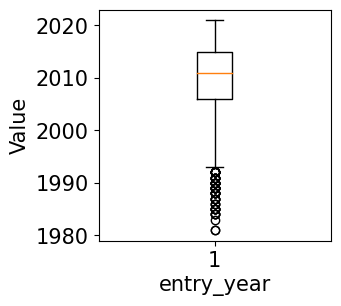

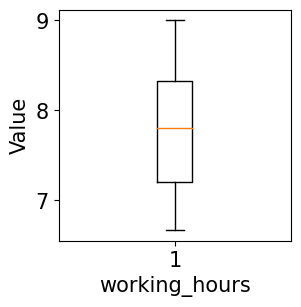

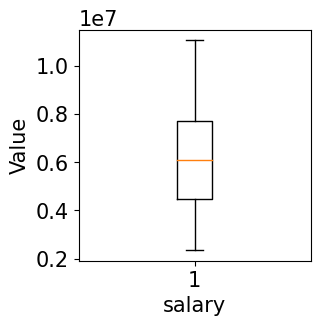

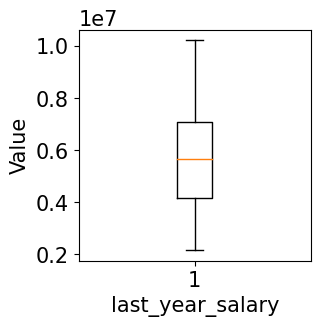

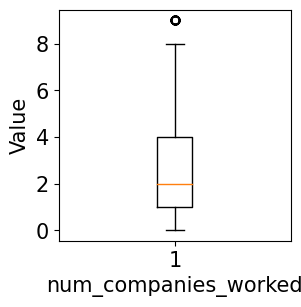

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['font.size'] = 15

number_columns = ['entry_year', 'working_hours', 'salary', 'last_year_salary', 'num_companies_worked']

for column in number_columns:
  fig, ax = plt.subplots()
  ax.boxplot(hr[column])
  ax.set_xlabel(column)
  ax.set_ylabel('Value')
  plt.show()

#4. 입사 나이 변수를 추가하세요.
* 생년월일(birthday)와 입사 년도(entry_year) 변수를 이용해 입사 나이(entry_age)를 데이터프레임에 추가합니다.
* 생년월일(birthday) 변수를 제거합니다.
* 첫 5개 행을 출력합니다.

In [ ]:
hr['entry_age'] = hr['entry_year'] - hr['birthday'].str.split('-').str.get(0).astype(int)
hr.drop('birthday', axis=1, inplace=True)
hr.head()

,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,entry_age
Unnamed: 0,,,,,,,,,,,
0,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes,33
1,2011,rnd,married,very high,medium,6.93,5170672,4617495,2.0,no,39
2,2014,rnd,single,high,high,9.00,9898200,9176045,6.0,yes,30
3,2013,rnd,married,high,high,8.33,5673500,5362476,1.0,no,25
4,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no,21


# 5. 범주형 변수를 수치형 변수로 인코딩하세요.
* 범주형 변수들의 고유값 수를 출력합니다.
* 순서형 변수와 고유값이 두 개인 명목형 변수는 0부터 (고유값의 수)까지의 정수로 변경합니다.
* 고유값이 세 개 이상인 명목형 변수는 원-핫 인코딩을 수행합니다.
 * 새로 추가된 행의 데이터 타입을 int로 지정합니다.
* 데이터 타입을 출력합니다.

In [ ]:
hr['department'].value_counts()

,count
department,
rnd,956
sales,441
hr,62


In [ ]:
hr['marital_status'].value_counts()

,count
marital_status,
married,669
single,466
etc,324


In [ ]:
hr_onehot = pd.get_dummies(hr, columns = ['department', 'marital_status'])
hr_onehot.iloc[:, -6:] = hr_onehot.iloc[:, -6:].astype(int)
hr_onehot

,entry_year,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,entry_age,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single
Unnamed: 0,,,,,,,,,,,,,,,
0,2013,high,very high,8.33,9431500,8923739,8.0,yes,33,0,0,1,0,0,1
1,2011,very high,medium,6.93,5170672,4617495,2.0,no,39,0,1,0,0,1,0
2,2014,high,high,9.00,9898200,9176045,6.0,yes,30,0,1,0,0,0,1
3,2013,high,high,8.33,5673500,5362476,1.0,no,25,0,1,0,0,1,0
4,2015,high,medium,7.20,3484080,3284389,9.0,no,21,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2004,high,very high,7.50,3488175,3214315,4.0,no,19,0,1,0,0,1,0
1466,2012,high,low,8.33,4442500,4113806,4.0,no,30,0,1,0,0,1,0
1467,2015,very high,medium,8.33,8715500,7908802,1.0,no,21,0,1,0,0,1,0


In [ ]:
hr_onehot['performance_rating'].value_counts()

,count
performance_rating,
high,1234
very high,225


In [ ]:
hr_onehot['job_satisfaction'].value_counts()

,count
job_satisfaction,
very high,458
high,438
low,285
medium,278


In [ ]:
hr_onehot['attrition'].value_counts()

,count
attrition,
no,1225
yes,234


In [ ]:
mapping = {'high':0,'very high':1}
hr_onehot['performance_rating'] = hr_onehot['performance_rating'].map(mapping)
hr_onehot['performance_rating']

,performance_rating
Unnamed: 0,
0,0
1,1
2,0
3,0
4,0
...,...
1465,0
1466,0
1467,1


In [ ]:
mapping = {'low':0,'medium':1,'high':2,'very high':3}
hr_onehot['job_satisfaction'] = hr_onehot['job_satisfaction'].map(mapping)
hr_onehot['job_satisfaction']

,job_satisfaction
Unnamed: 0,
0,3
1,1
2,2
3,2
4,1
...,...
1465,3
1466,0
1467,1


In [ ]:
mapping = {'no':0,'yes':1}
hr_onehot['attrition'] = hr_onehot['attrition'].map(mapping)
hr_onehot['attrition']

,attrition
Unnamed: 0,
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0


#6. 데이터를 훈련 데이터와 테스트 데이터로 분할하세요.
* 퇴사 여부(attrition)을 종속 변수, 나머지 변수를 독립 변수로 설정합니다.
* 훈련 테스트 80%, 테스트 데이터 20%입니다.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

y = hr_onehot['attrition']
X = hr_onehot.drop('attrition', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
X_train.shape

(1167, 14)

In [ ]:
X_test.shape

(292, 14)

In [ ]:
y_train.shape

(1167,)

In [ ]:
y_test.shape

(292,)

#(옵션) 랜덤포레스트 모델을 학습시킨 후 정확도를 출력하세요.
* 랜덤포레스트 외의 다른 모델을 이용해도 괜찮습니다.
* 훈련 데이터로 모델을 학습시킵니다.
 * 하이퍼파리미터 튜닝을 진행해도 좋습니다.
* 테스트 데이터로 모델의 정확도를 계산해 출력합니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from hyperopt import hp, tpe, fmin, Trials
import numpy as np


rf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=42)
rf.fit(X_train,y_train)

predict1 = rf.predict(X_test)
print(accuracy_score(y_test,predict1))

0.8253424657534246


In [ ]:
########################
### 1. Grid Search
########################

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [10, 50, 100],  # 트리 개수
    'max_depth': [None, 10, 20],    # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10], # 노드를 나누는 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],   # 리프 노드에 있어야 하는 최소 샘플 수
    'bootstrap': [True, False],  # 부트스트랩 샘플링 여부
}

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.845791554865132


In [ ]:
########################
### 2. Random Search
########################

# 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': [10, 50, 100],  # 트리 개수
    'max_depth': [None, 10, 20],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 나누기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드에 필요한 최소 샘플 수
    'bootstrap': [True, False],  # 부트스트랩 샘플링 여부
}


In [ ]:
# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42)

In [ ]:
# 모델 학습
random_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("Best hyperparameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best cross-validation score: 0.8423598361813303


In [ ]:
########################
### 3. Bayesian Optimization
########################

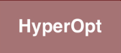

In [ ]:
!pip install hyperopt


In [ ]:
import numpy as np
from hyperopt import hp, tpe, fmin, Trials
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# 데이터 로드
# iris = load_iris()
# X = iris.data
# y = iris.target


In [ ]:
# 목적 함수 정의
def objective(params):
    clf = DecisionTreeClassifier(**params)
    # 교차 검증을 통해 평균 정확도 반환 (음수로 반환해야 최소화 문제로 설정)
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    return -accuracy

In [ ]:
# 하이퍼파라미터 공간 정의
space = {
    'max_depth': hp.choice('max_depth', np.arange(1, 20, dtype=int)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.1, 0.5),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

In [ ]:
# 최적화 실행
trials = Trials()  # 최적화 과정 기록
best = fmin(fn=objective,         # 목적 함수
            space=space,          # 하이퍼파라미터 탐색 공간
            algo=tpe.suggest,     # 탐색 알고리즘
            max_evals=50,         # 시도할 최대 평가 수
            trials=trials)        # 최적화 과정 기록을 위한 객체


100%|██████████| 50/50 [00:06<00:00,  7.40trial/s, best loss: -0.8396177564374148]


In [ ]:

# 최적 하이퍼파라미터 출력
print("Best hyperparameters found:", best)


Best hyperparameters found: {'criterion': 1, 'max_depth': 11, 'min_samples_leaf': 0.19404469713900396, 'min_samples_split': 0.1041151938447942}
